### video source: https://www.youtube.com/watch?v=VMj-3S1tku0

### Import libraries

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create a function of X  and return Y

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

### run function of X = 3

In [3]:
f(3.0)

20.0

### create xs data

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

### Show YS from function of X = XS

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

### Plot YS function of XS

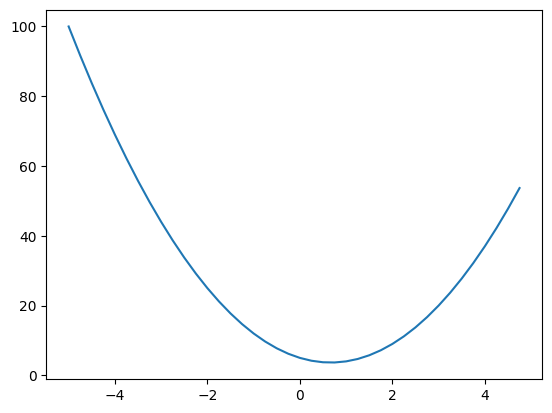

In [6]:
plt.plot(xs, ys)

### Create h interval to derivative the function

In [12]:
h = 0.00000001
x = 3.0

In [13]:
f(x)

20.0

In [14]:
f(x + h)

20.00000014

### delta f(x)2 - f(x)1:
$\Delta X = X2 - X1$ = $\Delta X = f(x + h)-f(x)$

In [15]:
f(x + h)-f(x)

1.400000009255109e-07

### Derivate x = 3

In [16]:
(f(x + h)-f(x))/h

14.00000009255109

### Derivate x = -3

In [17]:
x = -3
(f(x + h)-f(x))/h

-22.00000039920269

### Derivate x = 2/3

In [18]:
x = 2/3
(f(x + h)-f(x))/h

0.0

### lets get more complex

In [19]:
# les get more complex

a = 2.0
b = -3.0
c = 10.0
d = a*b + c

print(d)

4.0


### bump a = a+h

In [30]:
h = 0.0001

# inputs

a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c

a += h ### <---
d2 = a*b + c

print('d1', d1)
print('d2', d2)

print('slope', (d2 - d1)/h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


### bump b = b+h

In [31]:
h = 0.0001

# inputs

a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c

b += h ### <---
d2 = a*b + c

print('d1', d1)
print('d2', d2)

print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


### bump c = c+h

In [33]:
h = 0.0001

# inputs

a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c

c += h ### <---
d2 = a*b + c

print('d1', d1)
print('d2', d2)

print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


### Value object

In [2]:
class Value:
    
    def __init__(self, data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
a = Value(2.0)

Value(data=2.0)

In [4]:
b = Value(-3.0)
b

Value(data=-3.0)

In [5]:
a+b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

### Using special metodys __repr__ __add__  __mul__ to define operators (math with objects)

In [2]:
class Value:
    
    def __init__(self, data, _children=(),_op=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b+c
d

Value(data=4.0)

In [5]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [6]:
d._op

'+'

### Visualisation

In [7]:
from graphviz import Digraph

def trace(root):
    #build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = '{data %.4f}' % (n.data, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect ths node to it
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        # connect n1 to the op node fo n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

In [8]:
print(d)
print(d._prev)
print(d._op)

Value(data=4.0)
{Value(data=10.0), Value(data=-6.0)}
+


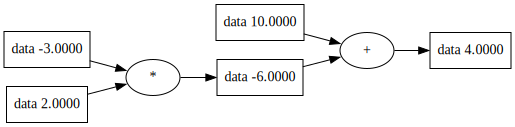

In [9]:
draw_dot(d)

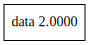

In [17]:
draw_dot(a)

### Creating a label

In [2]:
class Value:
    
    def __init__(self, data, _children=(),_op='',label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label= 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

### Visualisation with label

In [3]:
from graphviz import Digraph

def trace(root):
    #build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = '{%s |data %.4f}' % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect ths node to it
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        # connect n1 to the op node fo n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

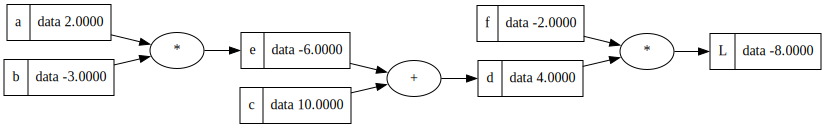

In [28]:
draw_dot(L)

### Creating grad to store the gradient relative to the output

In [4]:
class Value:
    
    def __init__(self, data, _children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label= 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

### Show grad on grapf

In [3]:
from graphviz import Digraph

def trace(root):
    #build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = '{%s |data %.4f| grad %.4f}' % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect ths node to it
            dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
        # connect n1 to the op node fo n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

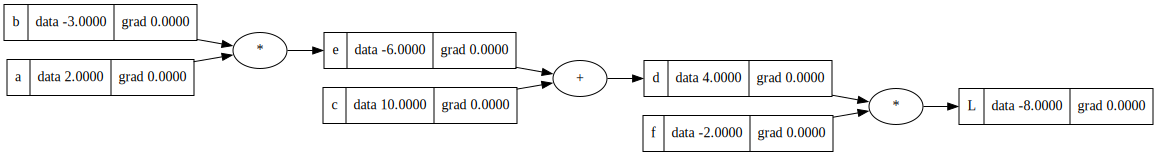

In [6]:
draw_dot(L)

### a+h

In [14]:
def lol():
    
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/h)

In [15]:
lol()

6.000000000021544


### L+h is the derivative of L by L equals 1

In [18]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data+h
    
    print((L2 - L1)/h)

In [19]:
lol()

1.000000000000334


## Manual backpropagation

### Manualy set grad of L to 1.0

In [20]:
L.grad = 1.0

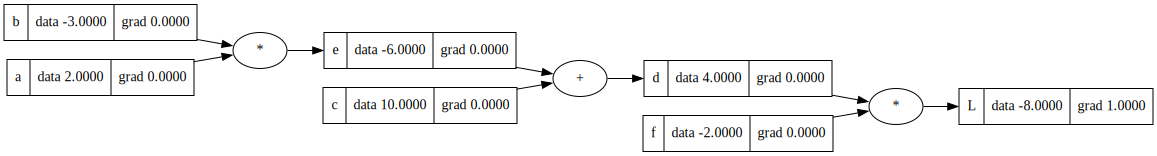

In [21]:
draw_dot(L)

L = d * f

dL / dd = f how?

(f(x+h)-f(x))/h

((d+h)*f - d*f)/h

(d*f + h*f - d*f) / h

(h*f)/h

f

In [22]:
L.grad = 1
f.grad = 4.0
d.grad = -2.0

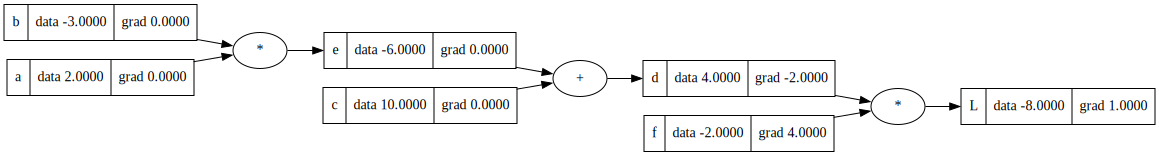

In [23]:
draw_dot(L)

### f+h is the derivative of L by f equals 4

In [73]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0+h, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('the devivative of L by f:',(L2 - L1)/h)

In [74]:
lol()

the devivative of L by f: 3.9999999999995595


### d+h is the derivative of L by d equals -2

In [71]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('the devivative of L by d:',(L2 - L1)/h)

In [72]:
lol()

the devivative of L by d: -2.000000000000668


### c+h is the derivative of L by c equals -2

dl / dc 

### fist c+h what is the derivative of d by c ? is 1

dd / dc ?

d = c + e

(f(x+h)-f(x))/h

((c+h + e) - (c + e))/h

(c + h + e - c - e)/h

h/h = 1


### and d by e ? is 1

dd / de ?

d = e + c

(f(x+h)-f(x))/h

((e + h + c) - (e + c))/h

(e + h + c - e - c)/h

h/h = 1


### c+h the derivative of d by c equals 1

In [67]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    d1 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0+h, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    d2 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('devivative of L by c:', (L2 - L1)/h)# -2.0
    print('devivative of d by c:', (d2 - d1)/h)

In [68]:
lol()

devivative of L by c: -1.9999999999988916
devivative of d by c: 0.9999999999994458


### by symmetry e+h the derivative of d by e equals 1

In [69]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    d = e+c; d.label = 'd'
    d1 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    e.data += h
    d = e+c; d.label = 'd'
    d2 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('devivative of L by e:', (L2 - L1)/h) # -2.0
    print('devivative of d by e:', (d2 - d1)/h)

In [70]:
lol()

devivative of L by e: -2.000000000000668
devivative of d by e: 1.000000000000334


### then

 dd / dc = 1.0
 
 dd / de = 1.0

### Chain rule

#### the go is to now the dirivative of L in repect to c : dL/dc

using the Chain rule of calculos:

dz/dx = (dz/dy)*(dy/dx)

than:

dL/dc = (dL/dd)*(dd/dc)

know:

dL/dd = -2.0

dd/dc = 1

than:
#### dL/dc = -2.0 * 1 = -2

In [60]:
c.grad = -2
e.grad = -2

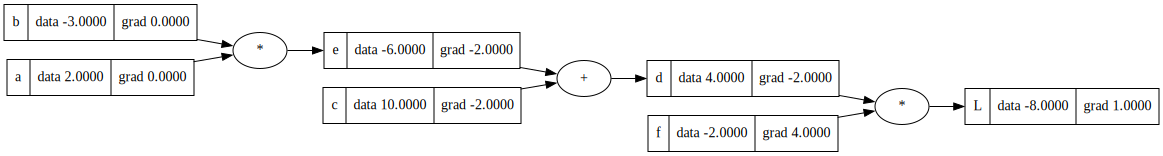

In [62]:
draw_dot(L)

### again using tha chain rule for the next layer

 know:
 
 dL/de = -2.0
 
 go:
 
 dL/da
 
 Chan rule
 
 dz/dx = (dz/dy)*(dy/dx)
 
 dL/da = (dL/de)*(de/da)
 
 dL/da = -2.0*(de/da)
 
 e = a * b

 de/da = b how?

 (f(x+h)-f(x))/h

 ((a+h)*b - a*b)/h

 (a*b + h*b - a*b) / h

 (h*b)/h

 b
 
 b = -3
 
 dL/da = -2.0*(de/da)
 
 dL/da = -2.0*-3.0
 
 dL/da = 6.0
 
 than:
 
 dL/db = -2.0 * a
 
 a = 2
 
 dL/db = -2.0 * 2
 
 dL/db = -4.0
 

### a+h the derivative of e by a equals -3 = (de/da)

In [75]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    e1 = e.data
    d = e+c; d.label = 'd'
    d1 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    e2 = e.data
    d = e+c; d.label = 'd'
    d2 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('devivative of L by a:', (L2 - L1)/h)# 6.0
    print('devivative of e by a:', (e2 - e1)/h)

In [76]:
lol()

devivative of L by a: 6.000000000000227
devivative of e by a: -3.0000000000001137


### by symmetry b+h the derivative of e by b equals 2 = (de/db)

In [77]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    e1 = e.data
    d = e+c; d.label = 'd'
    d1 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label= 'e'
    e2 = e.data
    d = e+c; d.label = 'd'
    d2 = d.data
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    
    print('devivative of L by b:', (L2 - L1)/h)# -4.0
    print('devivative of e by b:', (e2 - e1)/h)

In [78]:
lol()

devivative of L by b: -3.9999999999995595
devivative of e by b: 1.9999999999997797


In [79]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

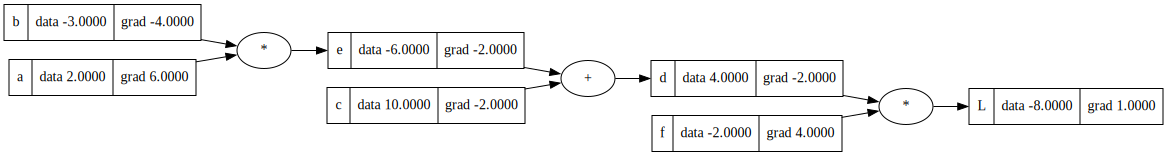

In [80]:
draw_dot(L)

#### reset data of leaf nodes

In [117]:
a.data = 2.0
b.data = -3.0
c.data = 10.0
#d.data = 4.0
#e.data = -6.0
f.data = -2.0

#### Change data of leaf nodes

In [118]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print (L.data)

-7.286496


### Second manual backpropagation example
#### backpropagation through a neuron

In [14]:
class Value:
    
    def __init__(self, data, _children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

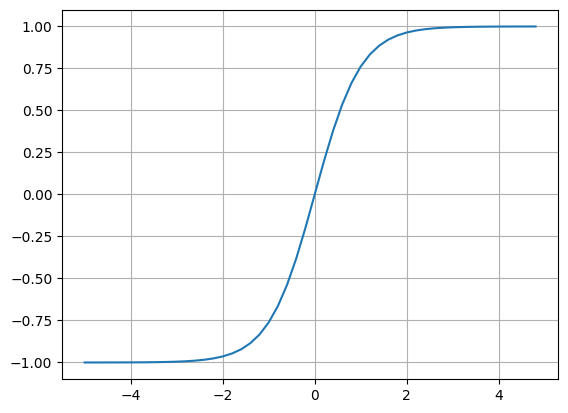

In [3]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

### Neuron

In [23]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the nouron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
# n = x1w1 + x2w2 +b
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'


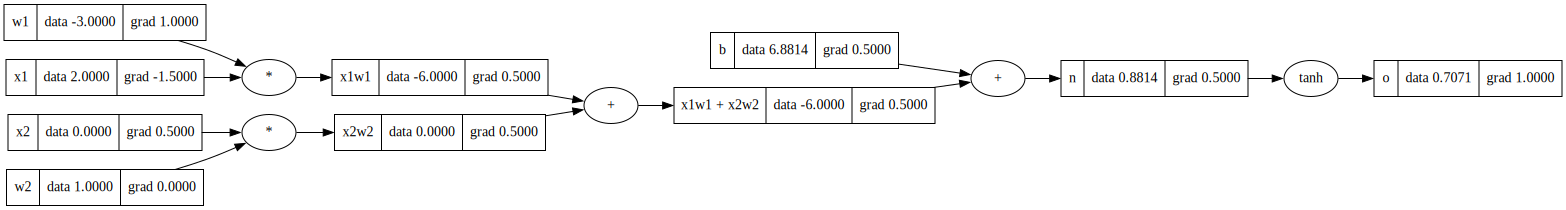

In [38]:
draw_dot(o)

In [25]:
o.grad = 1.0

#### derivative of tanh(x) = (1 - tanh(x)**2)

o = tanh(n)

do/dn = 1 - tanh(n)**2

do/dn = 1 - o**2

In [27]:
1 - o.data**2

0.4999999999999999

In [28]:
n.grad = 1 - o.data**2

In [31]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [33]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [35]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [37]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

## Automatic backpropagation

In [ ]:
class Value:
    
    def __init__(self, data, _children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data,(self,other),'*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

### Neuron

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the nouron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
# n = x1w1 + x2w2 +b
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'


#### Plot

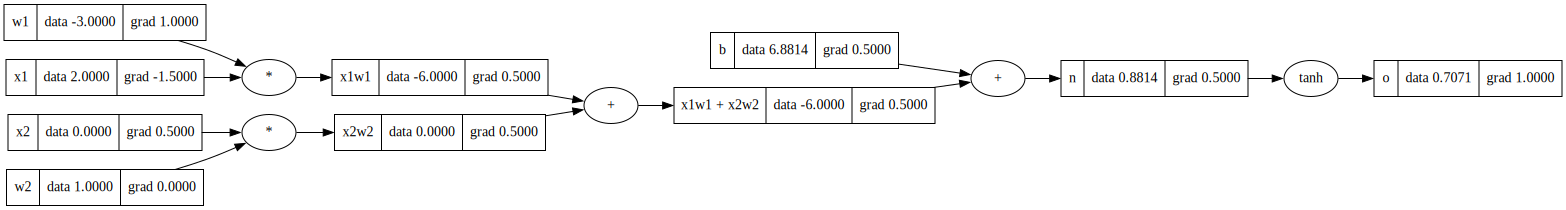

In [39]:
draw_dot(o)